In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import scipy.linalg as la
#import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
%matplotlib inline  
# maybe some 3D plot for the molecule?? Is it possible?

/Users/louispeng/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


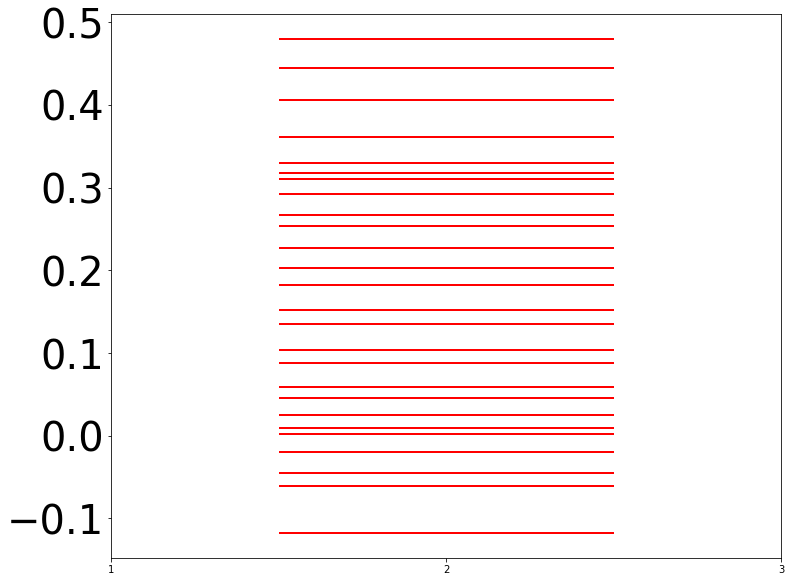

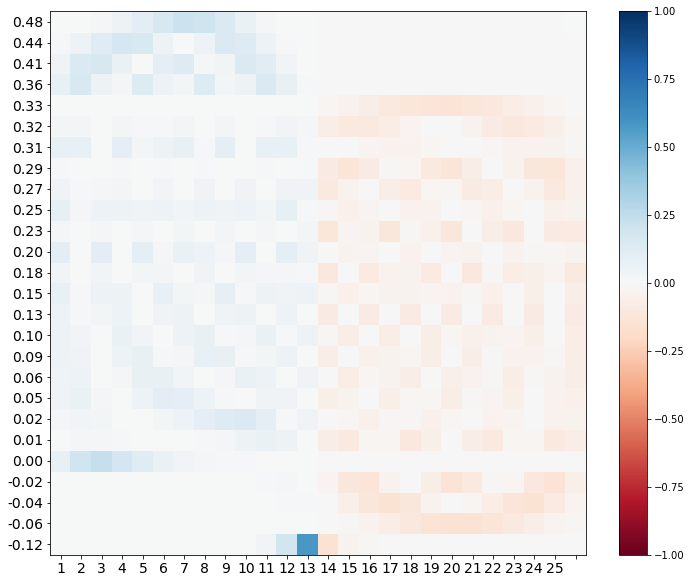

In [3]:
### From run-site-1.xyz to get time and traj. averaged site energies...
### BOMD calculation on the gs: tstep = 0.1 fs, Eoffset = 0.1 eV

#13 CT states + 13 EX states with 0.1 eV higher energies
#######################
barI = [0.0,0.144,0.208,0.239,0.253,0.258,0.256,0.251,0.242,0.232,0.22,0.207,0.193]
barII = [0.0,0.0336,0.0474,0.056,0.0618,0.0657,0.0684,0.07,0.0709,0.0712,0.0711,0.0705,0.0695]
n_states = 26
A = [0.]*n_states*n_states
#print(A)
t_ = -0.12       # CT-CT couplings -0.12
j_ = 0.1         # XT-XT couplings 0.1
lamda = 0.1      # XT-CT coupling 0.2
Eoff_ = 0.1  + 0.069 -0.035      #E_XT - E_CT = 0.1 (energy shift, diabatic energy diff between CT minimum and XT minimum) 
# 0.069 eV is the energy diff. for E_XT_OT9(N) - E_CT_OT9_C(N)
# -0.035 = E_C60_N(N) - E_C60_A(N)
#siteE_au: calculated site energies from force field
siteE_au = [6.2840935786739882, 6.2891848594196178, 6.2896901613963889, 6.2897245244709374, 6.2897287278183569,\
           6.2897248610760137, 6.2897214330303051, 6.2897228553837436, 6.2897239278475068, 6.2897227083547644,\
           6.28972829457875, 6.2897269717845239, 6.2897141220598156, 6.2742970915382479, 6.2835814502423917,\
           6.2863713255497959, 6.2875424032862419, 6.2880611055742772, 6.2882408315850968, 6.2881648856226127,\
           6.287982510567808, 6.2876522792474496, 6.2872843929674849, 6.2868487564633959, 6.2863692780002411,\
           6.2858449625132362]
#convert siteE_au to eV
siteE = [(x-6.2840935786739882)*27.2116 for x in siteE_au]
#print(siteE)

#######################

#CT block first
for i in range(13):
    for j in range(13):
        if i==j:
            #A[i*26+j] = siteE[i+13]
            A[i*26+j] = barI[i]
            if i==0:
                #A[i*26+j] = reorg1
                A[i*26+j+1] = t_
                A[13] = lamda    # lamda
            elif i ==12:
                A[i*26+j-1] = t_
            else:
                A[i*26+j-1] = t_
                A[i*26+j+1] = t_
#Then XT bolock
for i in range(13,26):
    for j in range(13,26):
        if i==j:
            A[i*26+j] = Eoff_ #+ 0.254
            #A[i*26+j] = siteE[i-13]
            
            if i == 13:
                A[i*26+j+1] = j_
                A[i*26] = lamda     #lamda
            elif i == 25:
                A[i*26+j-1] = j_
            else:
                A[i*26+j-1] = j_
                A[i*26+j+1] = j_

                
#print(A)
B = np.array(A).reshape(26,26)
#print(B)
eigvals, eigvecs = la.eig(B)
#print(eigvals)
#print(type(eigvals)) #numpy array
idxx = np.argsort(eigvals)[:26]
#print(type(idxx)) #numpy array
eigvals = eigvals[idxx]
#print(eigvecs) 
eigvecs = eigvecs[:,idxx]  #??
#print(eigvals)
#print(eigvecs)
#print(eigvecs[0])

eigvecs_2 = np.square(eigvecs)    
eigvecs_2 = np.transpose(eigvecs_2)

your_permutation = [12,11,10,9,8,7,6,5,4,3,2,1,0,13,14,15,16,17,18,19,20,21,22,23,24,25]
#idx = np.empty_like(your_permutation)
idx = np.array(your_permutation)
#idx[your_permutation] = np.arange(len(your_permutation))

eigvecs_2 = eigvecs_2[:, idx]

for x in range(26):
    for y in range(13,26):
        eigvecs_2[x,y] = -1*eigvecs_2[x,y]


#plt.subplot(1,2,1)        
fig1, ax1 = plt.subplots(figsize=(12,10))
for ii in range(26):
    ax1.hlines(y=eigvals, xmin=1, xmax=2, linewidth=2, color='r')
plt.xticks(np.arange(0.5, 3, 1),np.arange(1, 26, 1))
plt.yticks(fontsize=40)

#plt.savefig('./' + 'EigenE'+ '-Eoff0-5-lamda0-2-NGeom'+ '.png')

###########White to Blue Color Graph##############
#plt.subplot(1,2,2)
fig, ax = plt.subplots(figsize=(12,10))

img = ax.pcolor(eigvecs_2,cmap='RdBu',vmin=-1,vmax=1)
fig.colorbar(img,ax=ax)

ax.tick_params(labelsize=14)
eigvals = ['{:.2f}'.format(i) for i in np.real(eigvals)]

plt.yticks(np.arange(0.5, 26, 1),eigvals)
plt.xticks(np.arange(0.5, 26, 1),np.arange(1, 26, 1))
plt.xlim([0,26])
#plt.ylim([-0.19,0.48])
###################################################



plt.savefig('./' + 'Eigen'+ '-Eoff0-1-lamda0-1-NGeom'+ '.png')



/Users/louispeng/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


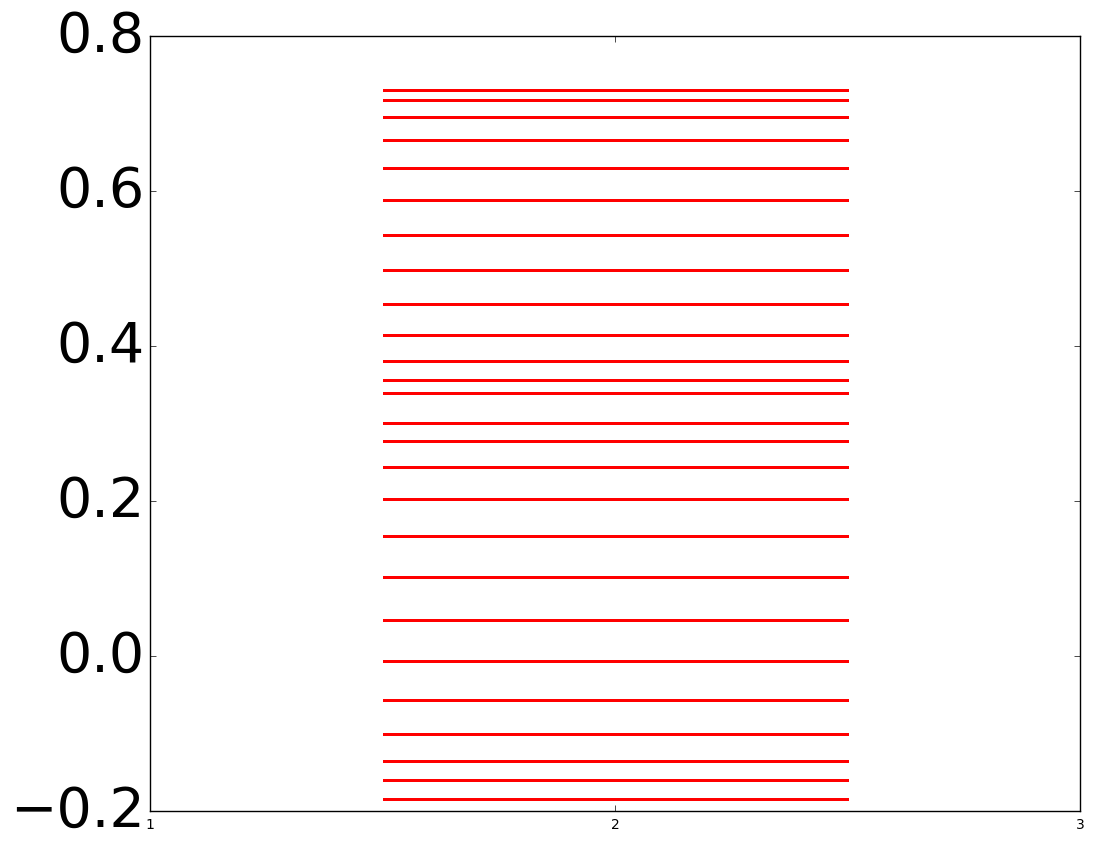

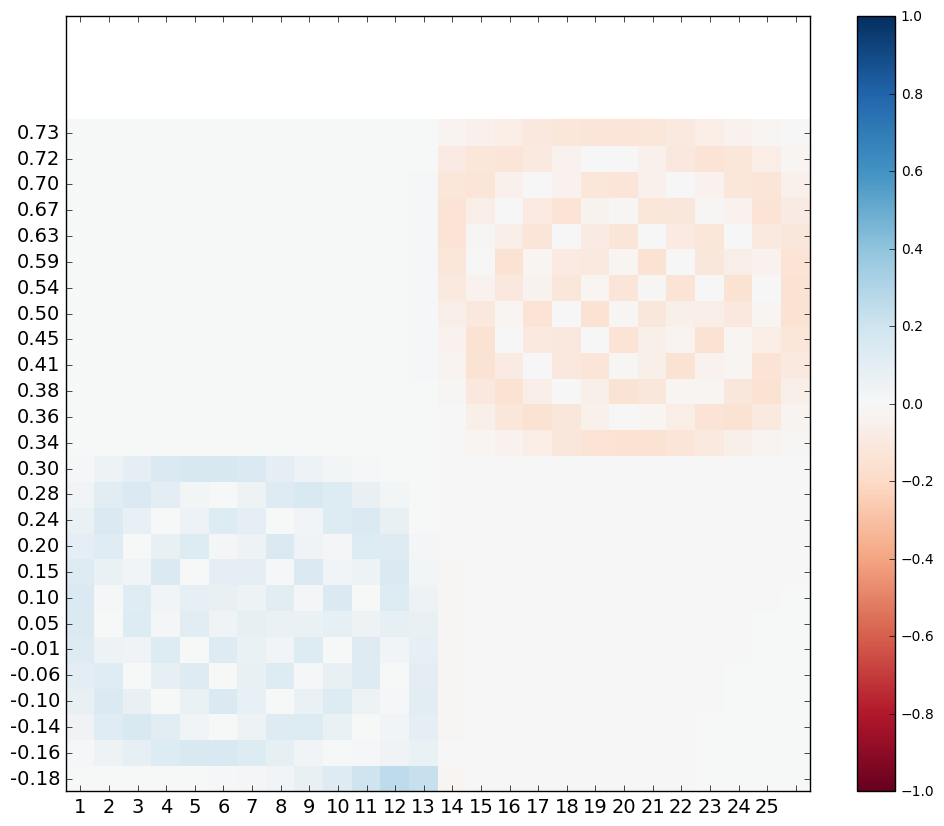

In [18]:
### From run-site-1.xyz to get time and traj. averaged site energies...
### BOMD calculation on the gs: tstep = 0.1 fs, Eoffset = 0.1 eV

#13 CT states + 13 EX states with 0.1 eV higher energies
#######################
barI = [0.0,0.144,0.208,0.239,0.253,0.258,0.256,0.251,0.242,0.232,0.22,0.207,0.193]
barII = [0.0,0.0336,0.0474,0.056,0.0618,0.0657,0.0684,0.07,0.0709,0.0712,0.0711,0.0705,0.0695]
n_states = 26
A = [0.]*n_states*n_states
#print(A)
t_ = -0.12       # CT-CT couplings
j_ = 0.1         # XT-XT couplings
lamda = 0.2      # XT-CT coupling
Eoff_ = 0.5  + 0.069 -0.035      #E_XT - E_CT = 0.1 (energy shift, diabatic energy diff between CT minimum and XT minimum) 
# 0.069 eV is the energy diff. for E_XT_OT9(N) - E_CT_OT9_C(N)
# -0.035 = E_C60_N(N) - E_C60_A(N)
#siteE_au: calculated site energies from force field
siteE_au = [6.2840935786739882, 6.2891848594196178, 6.2896901613963889, 6.2897245244709374, 6.2897287278183569,\
           6.2897248610760137, 6.2897214330303051, 6.2897228553837436, 6.2897239278475068, 6.2897227083547644,\
           6.28972829457875, 6.2897269717845239, 6.2897141220598156, 6.2742970915382479, 6.2835814502423917,\
           6.2863713255497959, 6.2875424032862419, 6.2880611055742772, 6.2882408315850968, 6.2881648856226127,\
           6.287982510567808, 6.2876522792474496, 6.2872843929674849, 6.2868487564633959, 6.2863692780002411,\
           6.2858449625132362]
#convert siteE_au to eV
siteE = [(x-6.2840935786739882)*27.2116 for x in siteE_au]
#print(siteE)

#######################

#CT block first
for i in range(13):
    for j in range(13):
        if i==j:
            #A[i*26+j] = siteE[i+13]
            A[i*26+j] = barII[i]
            if i==0:
                #A[i*26+j] = reorg1
                A[i*26+j+1] = t_
                A[13] = lamda    # lamda
            elif i ==12:
                A[i*26+j-1] = t_
            else:
                A[i*26+j-1] = t_
                A[i*26+j+1] = t_
#Then XT bolock
for i in range(13,26):
    for j in range(13,26):
        if i==j:
            A[i*26+j] = Eoff_ #+ 0.254
            #A[i*26+j] = siteE[i-13]
            
            if i == 13:
                A[i*26+j+1] = j_
                A[i*26] = lamda     #lamda
            elif i == 25:
                A[i*26+j-1] = j_
            else:
                A[i*26+j-1] = j_
                A[i*26+j+1] = j_

                
#print(A)
B = np.array(A).reshape(26,26)
#print(B)
eigvals, eigvecs = la.eig(B)
#print(eigvals)
#print(type(eigvals)) #numpy array
idxx = np.argsort(eigvals)[:26]
#print(type(idxx)) #numpy array
eigvals = eigvals[idxx]
#print(eigvecs) 
eigvecs = eigvecs[:,idxx]  #??
#print(eigvals)
#print(eigvecs)
#print(eigvecs[0])

eigvecs_2 = np.square(eigvecs)    
eigvecs_2 = np.transpose(eigvecs_2)

your_permutation = [12,11,10,9,8,7,6,5,4,3,2,1,0,13,14,15,16,17,18,19,20,21,22,23,24,25]
#idx = np.empty_like(your_permutation)
idx = np.array(your_permutation)
#idx[your_permutation] = np.arange(len(your_permutation))

eigvecs_2 = eigvecs_2[:, idx]

for x in range(26):
    for y in range(13,26):
        eigvecs_2[x,y] = -1*eigvecs_2[x,y]


#plt.subplot(1,2,1)        
fig1, ax1 = plt.subplots(figsize=(12,10))
for ii in range(26):
    ax1.hlines(y=eigvals, xmin=1, xmax=2, linewidth=2, color='r')
plt.xticks(np.arange(0.5, 3, 1),np.arange(1, 26, 1))
plt.yticks(fontsize=40)

plt.savefig('./' + 'EigenE'+ '-Eoff0-5-lamda0-2-NGeom-BarrierII'+ '.png')

###########White to Blue Color Graph##############
#plt.subplot(1,2,2)
fig, ax = plt.subplots(figsize=(12,10))

img = ax.pcolor(eigvecs_2,cmap='RdBu',vmin=-1,vmax=1)
fig.colorbar(img,ax=ax)

ax.tick_params(labelsize=14)
eigvals = ['{:.2f}'.format(i) for i in np.real(eigvals)]

plt.yticks(np.arange(0.5, 26, 1),eigvals)
plt.xticks(np.arange(0.5, 26, 1),np.arange(1, 26, 1))
plt.xlim([0,26])
#plt.ylim([-0.19,0.48])
###################################################



plt.savefig('./' + 'Eigen'+ '-Eoff0-5-lamda0-2-NGeom-BarrierII'+ '.png')



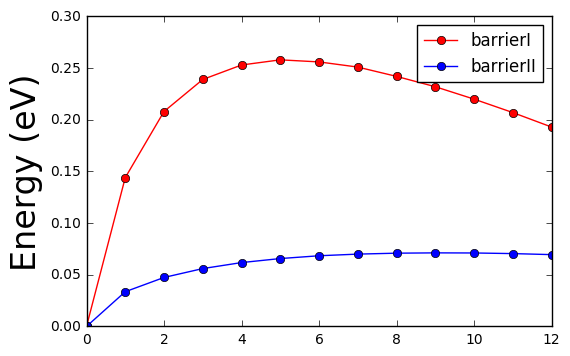

In [29]:
barI = [0.0,0.144,0.208,0.239,0.253,0.258,0.256,0.251,0.242,0.232,0.22,0.207,0.193]
barII = [0.0,0.0336,0.0474,0.056,0.0618,0.0657,0.0684,0.07,0.0709,0.0712,0.0711,0.0705,0.0695]

plt.plot(barI,'-ok',color='red',label='barrierI')
plt.plot(barII,'-ok',color='blue',label='barrierII')

ylabel('Energy (eV)',fontsize='24')

plt.legend(numpoints=1)

plt.savefig('./' + 'Barriers'+ '.png')

TypeError: cannot perform reduce with flexible type

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


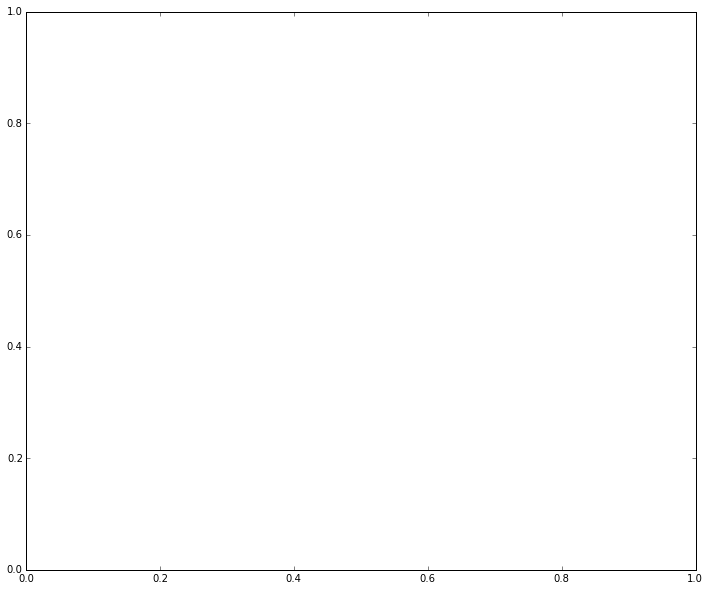

In [54]:
fig1, ax1 = plt.subplots(figsize=(12,10))
for ii in range(26):
    ax1.hlines(y=eigvals, xmin=1, xmax=2, linewidth=2, color='r')
plt.xticks(np.arange(0.5, 3, 1),np.arange(1, 26, 1))

plt.savefig(path + '/' + 'EigenE'+ '-Eoff0-1-NeutralGeom'+ '.png')

In [ ]:
### From run-site-1.xyz to get time and traj. averaged site energies...
### BOMD calculation on the gs: tstep = 0.1 fs, Eoffset = 0.01 eV

#13 CT states + 13 EX states with 0.1 eV higher energies
#######################
#barI = [0.0,0.144,0.208,0.239,0.253,0.258,0.256,0.251,0.242,0.232,0.22,0.207,0.193]
A = [0.]*26*26
#print(A)
t_ = -0.12
j_ = 0.1
lamda = 0.2
Eoff_ = 0.1                 # #E_XT - E_CT = 0.1 (energy shift)
path = '/Users/louispeng/Documents/Jochen/Meeting/August_2020/August_04'
###ReorgE
siteE_au = [6.2840935786739882, 6.2891848594196178, 6.2896901613963889, 6.2897245244709374, 6.2897287278183569,\
           6.2897248610760137, 6.2897214330303051, 6.2897228553837436, 6.2897239278475068, 6.2897227083547644,\
           6.28972829457875, 6.2897269717845239, 6.2897141220598156, 6.2742970915382479, 6.2835814502423917,\
           6.2863713255497959, 6.2875424032862419, 6.2880611055742772, 6.2882408315850968, 6.2881648856226127,\
           6.287982510567808, 6.2876522792474496, 6.2872843929674849, 6.2868487564633959, 6.2863692780002411,\
           6.2858449625132362]
siteE = [(x-6.2840935786739882)*27.2116 for x in siteE_au]
#print(siteE)

#######################
for i in range(13):
    for j in range(13):
        if i==j:
            A[i*26+j] = siteE[i+13]
            if i==0:
                #A[i*26+j] = reorg1
                A[i*26+j+1] = t_
                A[13] = lamda    # lamda
            elif i ==12:
                A[i*26+j-1] = t_
            else:
                A[i*26+j-1] = t_
                A[i*26+j+1] = t_
for i in range(13,26):
    for j in range(13,26):
        if i==j:
            #A[i*26+j] = Eoff_ + 0.254
            A[i*26+j] = siteE[i-13]
            
            if i == 13:
                A[i*26+j+1] = j_
                A[i*26] = lamda     #lamda
            elif i == 25:
                A[i*26+j-1] = j_
            else:
                A[i*26+j-1] = j_
                A[i*26+j+1] = j_

                
#print(A)
B = np.array(A).reshape(26,26)
#print(B)
eigvals, eigvecs = la.eig(B)
idxx = np.argsort(eigvals)[:26]
eigvals = eigvals[idxx]
eigvecs = eigvecs[:,idxx]
#print(eigvals)
#print(eigvecs)

eigvecs_2 = np.square(eigvecs)    
eigvecs_2 = np.transpose(eigvecs_2)

your_permutation = [12,11,10,9,8,7,6,5,4,3,2,1,0,13,14,15,16,17,18,19,20,21,22,23,24,25]
#idx = np.empty_like(your_permutation)
idx = np.array(your_permutation)
#idx[your_permutation] = np.arange(len(your_permutation))

eigvecs_2 = eigvecs_2[:, idx]


###########White to Blue Color Graph##############
fig, ax = plt.subplots(figsize=(12,10))

img = ax.pcolor(eigvecs_2,cmap='PuBu')
fig.colorbar(img,ax=ax)

ax.tick_params(labelsize=14)
eigvals = ['{:.2f}'.format(i) for i in np.real(eigvals)]

plt.yticks(np.arange(0.5, 26, 1),eigvals)
plt.xticks(np.arange(0.5, 26, 1),np.arange(1, 26, 1))

###################################################

plt.savefig(path + '/' + 'Eigen'+ '-Eoff0-1-NeutralGeom'+ '.png')

